# Scrape and Visualize Stock Screener
**Jupyter notebook that scrapes stocks data from Screener.in and creates charts.**

# 1. Part-1: Scraping Data and generating Report: 

* Sheet 1: Top Ratios 
* Sheet 2: Quarterly Results
* Sheet 3: Profit & Loss
* Sheet 4: Compounded Sales Growth
* Sheet 5: Compounded Profit Growth
* Sheet 6: Stock Price CAGR 
* Sheet 7: Return on Equity
* Sheet 8: Balance Sheet
* Sheet 9: Cash Flows
* Sheet 10: Ratios
* Sheet 11: Shareholdin
ng Pattern

## 1.1 Imports & Predefined functions: 

In [164]:
import requests as rq
import pandas as pd 
import time
import datetime
from bs4 import BeautifulSoup
import re
import os
from plotly.subplots import make_subplots


### 1.1.1 Function that transforms Unordered list to dataframe: 

In [165]:
def csvfy(lines):
    import re

    # Line - 0
    if m := re.match(r"Market Cap ₹ ([0-9,.-]+) Cr.", lines[0]):
        line_0 = m.group(1).replace(',','')
    else: 
        line_0 = "NaN"

    # Line - 1
    if m := re.match(r"Current Price ₹ ([0-9,.-]+)", lines[1]):
        line_1 = m.group(1).replace(',','')
    else: 
        line_1 = "NaN"

    # Line - 2a
    if m := re.match(r"High \/ Low ₹ ([0-9,..-]+) \/ ([0-9,.]+)", lines[2]):
        line_2a = m.group(1).replace(',','')
    else: 
        line_2a = "NaN"

    # Line - 2b
    if m := re.match(r"High \/ Low ₹ ([0-9,.-]+) \/ ([0-9,.]+)", lines[2]):
        line_2b = m.group(2).replace(',','')
    else: 
        line_2b = "NaN"

    # Line - 3
    if m := re.match(r"Stock P\/E ([0-9,.-]+)", lines[3]):
        line_3 = m.group(1).replace(',','')
    else: 
        line_3 = "NaN"

    # Line - 4
    if m := re.match(r"Book Value ₹ ([0-9,.-]+)", lines[4]):
        line_4 = m.group(1).replace(',','')
    else: 
        line_4 = "NaN"

    # Line - 5
    if m := re.match(r"Dividend Yield ([0-9,.-]+) %", lines[5]):
        line_5 = m.group(1).replace(',','')
    else: 
        line_5 = "NaN"

    # Line - 6
    if m := re.match(r"ROCE ([0-9,.-]+) %", lines[6]):
        line_6 = m.group(1).replace(',','')
    else: 
        line_6 = "NaN"

    # Line - 7
    if m := re.match(r"ROE ([0-9,.-]+) %", lines[7]):
        line_7 = m.group(1).replace(',','')
    else: 
        line_7 = "NaN"

    # Line - 8
    if m := re.match(r"Face Value ₹ ([0-9,.-]+)", lines[8]):
        line_8 = m.group(1).replace(',','')
    else: 
        line_8 = "NaN"

    x = [{
    "Market Cap in Cores Rupees":line_0,
    "Current Price in Rupees":line_1,
    "High in Rupees":line_2a,
    "Low in Rupees":line_2b,
    "Stock PE":line_3,
    "Book Value in Rupees":line_4,
    "Dividend Yield %": line_5,
    "ROCE %":line_6,
    "ROE %":line_7,
    "Face Value in Rupees":line_8,
    }]

    df = pd.DataFrame(x)

    return df.copy()

## 1.2 Enter URL: 

>  ⚠️ <span style="color:red"> **Update the correct Screener.in URL for the stock:**</span>

Instructions: 
1. Visit [Screener.in](https://www.screener.in/)
2. Find & copy the correct stock url from search. Also, copy the Stock Symbol.
3. Paste it here.

> Note: Some stock urls have _/consolidated/_ at the end so be careful. Don't omit.    

In [166]:

stock_screener_url = "https://www.screener.in/company/TRENT/consolidated/"

stock_symbol = "TRENT" 


## 1.3 Scrape stock data: 

In [167]:
writer = None
dir_path = "../Output/IndividualStocks/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+"/"


if not os.path.exists(dir_path):
    os.makedirs(dir_path)

## Read entire page using Pandas

print("Loading Page for ",stock_symbol)
tables = pd.read_html(stock_screener_url)

time.sleep(1) # Seconds

# Read the Top Ration. Top Ratios section is a List Item, not a table hence need 
# to parse manually usiang bsoup 
response = rq.get(stock_screener_url)
# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")
# Find the unordered list
ul = soup.find("ul#top-ratios")  # You might need to use a more specific selector like ul.my-list
lines = []
for ul in soup.findAll('ul', id='top-ratios'):
    for li in ul.findAll('li'):
        li_parsed_text = li.text
        li_parsed_text = re.sub('[\s ]+', ' ', li_parsed_text)
        li_parsed_text = li_parsed_text.strip()
        #print(li_parsed_text)
        lines.append(li_parsed_text)
   
time.sleep(1) # Seconds


# Get all Tables in separate dataframes
df_top_ratios               = csvfy(lines) # Call function
df_quaterly_results         = tables[0] # Quarterly Results
df_profit_n_loss            = tables[1] # Profit & Loss
df_compounded_sales_growth  = tables[2] # Compounded Sales Growth
df_compounded_profit_growth = tables[3] # Compounded Profit Growth
df_stock_price_cagr         = tables[4] # Stock Price CAGR
df_return_on_equity         = tables[5] # Return on Equity
df_balance_sheet            = tables[6] # Balance Sheet
df_cash_flows               = tables[7] # Cash Flows
df_ratios                   = tables[8] # Ratios
df_shareholding_pattern     = tables[9] # Shareholding Pattern

# Cleanup table: Quarterly Results
df_quaterly_results.rename(columns={'Unnamed: 0':'Quarterly Results'}, inplace=True)
df_quaterly_results.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Profit & Loss
df_profit_n_loss.rename(columns={'Unnamed: 0':'Profit and Loss'}, inplace=True)
df_profit_n_loss.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Compounded Sales Growth
df_compounded_sales_growth.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Compounded Profit Growth
df_compounded_profit_growth.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Stock Price CAGR
df_stock_price_cagr.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Return on Equity
df_return_on_equity.replace(":", "", regex=True,inplace=True) 

# Cleanup table: Balance Sheet
df_balance_sheet.rename(columns={'Unnamed: 0':'Balance Sheet'}, inplace=True)
df_balance_sheet.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Cash Flows
df_cash_flows.rename(columns={'Unnamed: 0':'Cash Flows'}, inplace=True)
df_cash_flows.replace(u"\u00A0\+", "", regex=True,inplace=True) 

# Cleanup table: Ratios
df_ratios.rename(columns={'Unnamed: 0':'Ratios'}, inplace=True)

# Cleanup table: Shareholding Pattern
df_shareholding_pattern.rename(columns={'Unnamed: 0':'Shareholding Pattern'}, inplace=True)
df_shareholding_pattern.replace(u"\u00A0\+", "", regex=True,inplace=True)


sheet_names = ["Top Ratios","Quarterly Results", "Profit & Loss", "Compounded Sales Growth", "Compounded Profit Growth", 
               "Stock Price CAGR", "Return on Equity", "Balance Sheet", "Cash Flows", "Ratios", "Shareholding Pattern"]
dataframes  = [df_top_ratios, df_quaterly_results, df_profit_n_loss , df_compounded_sales_growth, df_compounded_profit_growth, 
               df_stock_price_cagr, df_return_on_equity, df_balance_sheet, df_cash_flows, df_ratios, df_shareholding_pattern]

writer = pd.ExcelWriter(dir_path + stock_symbol + ".xlsx" , engine='xlsxwriter')
for i, frame in enumerate(dataframes):
    frame.to_excel(writer, sheet_name = sheet_names[i], index=False)
writer.close()
writer.handles = None

print("Finished. Report Generated:", (dir_path + stock_symbol + ".xlsx") )

stock_report_file = "" + dir_path + stock_symbol + ".xlsx"

Loading Page for  TRENT
Finished. Report Generated: ../Output/IndividualStocks/20240822-102518/TRENT.xlsx


# 2. Part-2. Quarter Results Data: 

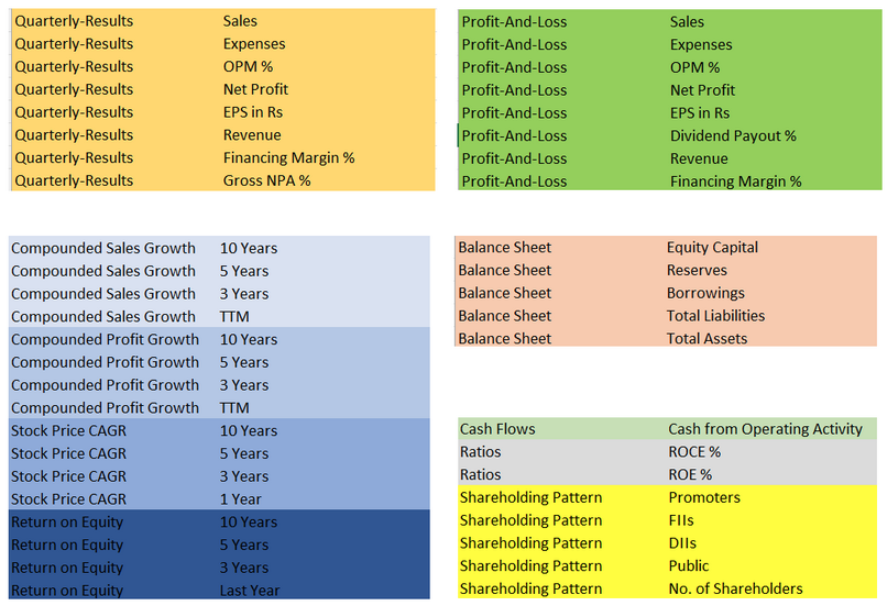

## 2.1 Imports:

In [168]:
import plotly.offline as pyo 
import plotly.graph_objects as go

## 2.2 Functions that transform dataframe: 

In [169]:
def sort_columns_chrono(temp_df):
    date = '1970-01-01'
    temp_df = temp_df.sort_index(axis=1, key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date))
    return temp_df.copy()

def transpose_reset_index(temp_df,colname_before,colname_after):
    temp_df = temp_df.rename(columns={colname_before: colname_after})
    temp_df = temp_df.set_index(colname_after).T
    return temp_df.copy()

# Define One more function to handle Finanace stocks 

def fix_banks_nbfc_df_qr(temp_df):
    # Revenue --> Sales
    temp_df['Quarterly Results'] = temp_df['Quarterly Results'].str.replace('Revenue', 'Sales')
    # Financing Profit  --> Operating Profit
    temp_df['Quarterly Results'] = temp_df['Quarterly Results'].str.replace('Financing Profit', 'Operating Profit')
    # OPM % --> Profit Margin
    temp_df['Quarterly Results'] = temp_df['Quarterly Results'].str.replace('OPM %', 'Profit Margin %')
    # Financing Margin % --> Profit Margin
    temp_df['Quarterly Results'] = temp_df['Quarterly Results'].str.replace('Financing Margin %', 'Profit Margin %')
    return temp_df.copy()

def fix_banks_nbfc_df_yr(temp_df):
    # Revenue --> Sales
    temp_df['Profit and Loss'] = temp_df['Profit and Loss'].str.replace('Revenue', 'Sales')
    # Financing Profit  --> Operating Profit
    temp_df['Profit and Loss'] = temp_df['Profit and Loss'].str.replace('Financing Profit', 'Operating Profit')
    # OPM % --> Profit Margin
    temp_df['Profit and Loss'] = temp_df['Profit and Loss'].str.replace('OPM %', 'Profit Margin %')
    # Financing Margin % --> Profit Margin
    temp_df['Profit and Loss'] = temp_df['Profit and Loss'].str.replace('Financing Margin %', 'Profit Margin %')
    return temp_df.copy()



In [170]:
xls = pd.ExcelFile(stock_report_file)

df_top_ratios               = pd.read_excel(xls, 'Top Ratios') # Top Ratios
df_quaterly_results         = pd.read_excel(xls, 'Quarterly Results') # Quarterly Results
df_profit_n_loss            = pd.read_excel(xls, 'Profit & Loss') # Profit & Loss
df_compounded_sales_growth  = pd.read_excel(xls, 'Compounded Sales Growth') # Compounded Sales Growth
df_compounded_profit_growth = pd.read_excel(xls, 'Compounded Profit Growth') # Compounded Profit Growth
df_stock_price_cagr         = pd.read_excel(xls, 'Stock Price CAGR') # Stock Price CAGR
df_return_on_equity         = pd.read_excel(xls, 'Return on Equity') # Return on Equity
df_balance_sheet            = pd.read_excel(xls, 'Balance Sheet') # Balance Sheet
df_cash_flows               = pd.read_excel(xls, 'Cash Flows') # Cash Flows
df_ratios                   = pd.read_excel(xls, 'Ratios') # Ratios
df_shareholding_pattern     = pd.read_excel(xls, 'Shareholding Pattern') # Shareholding Pattern


# To check the column types:
#df_quaterly_results.infer_objects().info()

## 2.3 Function call transform dataframe: 

In [171]:
# Dataframe: Quarterly Results:
df_quaterly_results = fix_banks_nbfc_df_qr(df_quaterly_results) 
df_quaterly_results = sort_columns_chrono(df_quaterly_results)
df_quaterly_results = transpose_reset_index(df_quaterly_results,'Quarterly Results','Quarter')

# EPS Percent Change:
df_quaterly_results['EPS Change %'] = df_quaterly_results['EPS in Rs'].astype(float).pct_change()*100
df_quaterly_results['EPS Change %'] = df_quaterly_results['EPS Change %'].fillna(0)

# df_quaterly_results.head(2)

# Dataframe: Ratios: 
df_ratios = sort_columns_chrono(df_ratios)
df_ratios = transpose_reset_index(df_ratios,'Ratios','Year')

# df_ratios.head()

# Dataframe: Shareholding Pattern: 
df_shareholding_pattern = sort_columns_chrono(df_shareholding_pattern)
df_shareholding_pattern = transpose_reset_index(df_shareholding_pattern,'Shareholding Pattern','Quarter')

# Shareholders Change %:
df_shareholding_pattern['Shareholders Change %'] = df_shareholding_pattern['No. of Shareholders'].astype(float).pct_change()*100
df_shareholding_pattern['Shareholders Change %'] = df_shareholding_pattern['Shareholders Change %'].fillna(0)

#df_shareholding_pattern.head(3)

# Dataframe: Cash Flows: 
df_cash_flows = sort_columns_chrono(df_cash_flows)
df_cash_flows = transpose_reset_index(df_cash_flows,'Cash Flows','Year')

# Dataframe: Balance Sheet: 
df_balance_sheet = sort_columns_chrono(df_balance_sheet)
df_balance_sheet = transpose_reset_index(df_balance_sheet,'Balance Sheet','Year')

# Dataframe: Profit and Loss: 
df_profit_n_loss = fix_banks_nbfc_df_yr(df_profit_n_loss) 
df_profit_n_loss = sort_columns_chrono(df_profit_n_loss)
df_profit_n_loss = transpose_reset_index(df_profit_n_loss,'Profit and Loss','Year')
df_profit_n_loss = pd.concat([df_profit_n_loss.iloc[1:], df_profit_n_loss.iloc[:1]]) # Move Row TTM at end 

# EPS Percent Change:
df_profit_n_loss['EPS Change %'] = df_profit_n_loss['EPS in Rs'].astype(float).pct_change()*100
df_profit_n_loss['EPS Change %'] = df_profit_n_loss['EPS Change %'].fillna(0)


# Part-3. Quaterly Results Analyzed:

## 3.1 Quaterly Result - Sales, Expenses, Operating Profit, and Net Profit Trend:

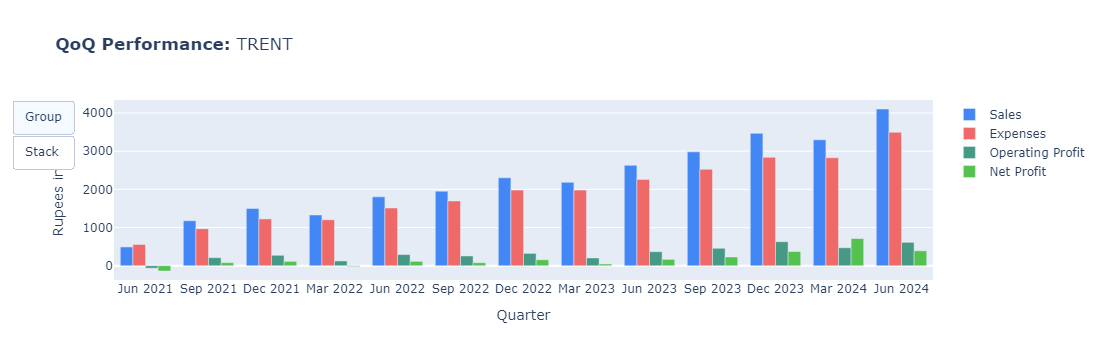

In [172]:
## Charting
fig1 = go.Figure()

x  = df_quaterly_results.index
y1 = df_quaterly_results['Sales'].astype(float) # Sales Column
y2 = df_quaterly_results['Expenses'].astype(float) # Expenses Column
y3 = df_quaterly_results['Operating Profit'].astype(float) # Expenses Column
y4 = df_quaterly_results['Net Profit'].astype(float) # Expenses Column

fig1.add_trace(go.Bar(x=x, y=y1, name='Sales', marker_color ="#4287f5")) 
fig1.add_trace(go.Bar(x=x, y=y2, name='Expenses', marker_color ="#f06969"))
fig1.add_trace(go.Bar(x=x, y=y3, name='Operating Profit', marker_color ="#469984"))
fig1.add_trace(go.Bar(x=x, y=y4, name='Net Profit', marker_color ="#53c24f"))




plot_title = '<b>QoQ Performance: </b>' + stock_symbol

fig1.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')


updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

#fig.update_traces(marker_color='green')


fig1.update_layout(updatemenus=updatemenus)

# pyo.plot(fig, filename="temp-plot.html")
fig1.show()

## 3.2 Quaterly Result - Profit Margin % Trend:

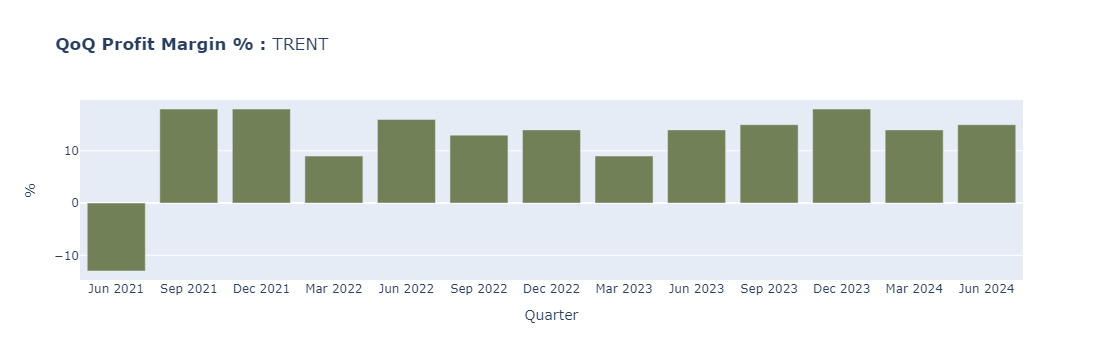

In [173]:
## Charting
fig2 = go.Figure()

x  = df_quaterly_results.index
y1 = df_quaterly_results['Profit Margin %'].str.rstrip('%').astype(float) # Sales Column


fig2.add_trace(go.Bar(x=x, y=y1, name='Financing or Operating Profit Margin %', marker_color ="#718057"))

plot_title = '<b>QoQ Profit Margin % : </b>' + stock_symbol

fig2.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title=' % ')


# pyo.plot(fig, filename="temp-plot.html")
fig2.show()

## 3.3 Quaterly Result - Net Profit Margin % Trend:

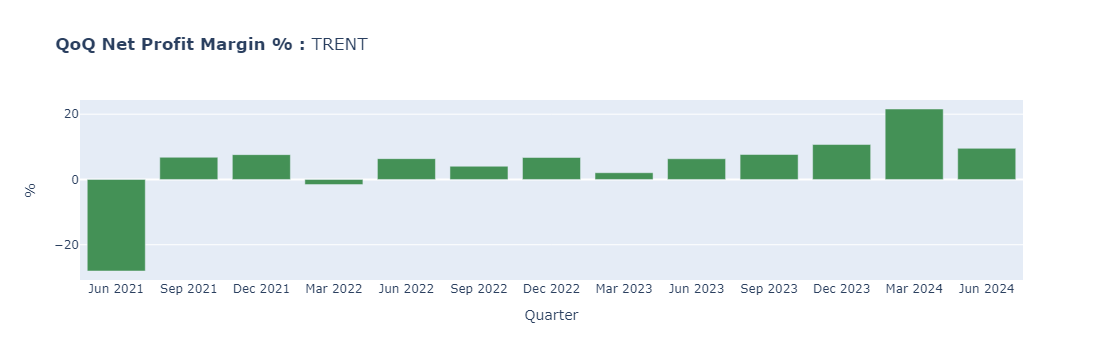

In [174]:
## Charting
fig3 = go.Figure()

x  = df_quaterly_results.index
y1 = df_quaterly_results['Sales'].astype(float) # Sales Column
y2 = df_quaterly_results['Net Profit'].astype(float) # Expenses Column

y3 = y2 / y1 * 100
 
fig3.add_trace(go.Bar(x=x, y=y3, name='Net Profit Margin %', marker_color ="#449156"))

plot_title = '<b>QoQ Net Profit Margin % : </b>' + stock_symbol

fig3.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title=' % ')


# pyo.plot(fig, filename="temp-plot.html")
fig3.show()

## 3.4 Quaterly Result - EPS Trend:

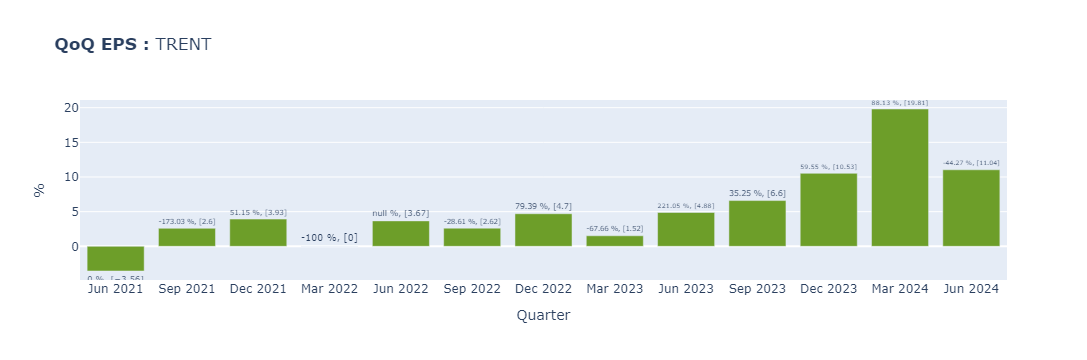

In [175]:
## Charting
fig4 = go.Figure()

x  = df_quaterly_results.index
y1 = df_quaterly_results['EPS in Rs'].astype(float) # EPS Column
y2 = df_quaterly_results['EPS Change %'].apply(lambda x: round(x, 2)) # Percent Change 


# https://stackoverflow.com/a/70452260/1176573

fig4.add_trace(go.Bar( x=x, y=y1, 
                      name='EPS in Rs', 
                      marker_color ="#6d9e29",  #6d9e29 1c9c7c
                      text=y2,
                      textposition="outside",
                      texttemplate="%{text} %, [%{y}]"
                     )
              )

plot_title = '<b>QoQ EPS : </b>' + stock_symbol

fig4.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title=' % ')

# pyo.plot(fig, filename="temp-plot.html")
fig4.show()

## 3.5 Quaterly Result - NPA Trend:

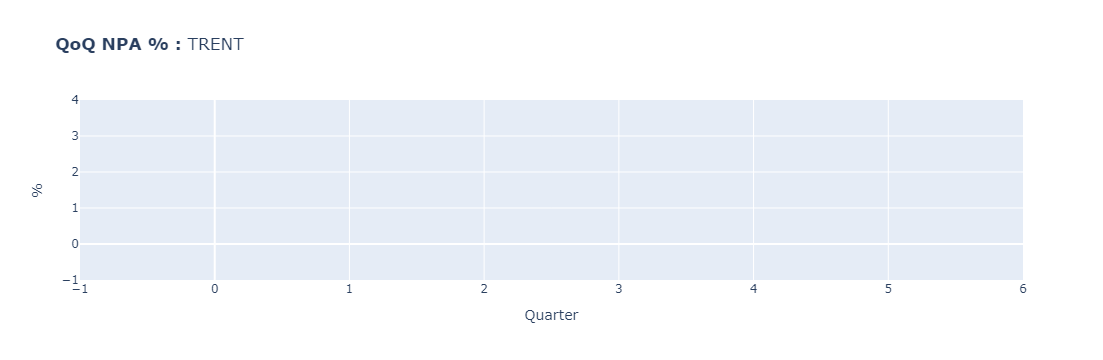

In [176]:
## Charting
fig5 = go.Figure()


plot_title = '<b>QoQ NPA % : </b>' + stock_symbol
fig5.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='%')

if 'Gross NPA %' in df_quaterly_results.columns:
    ## Charting
    x  = df_quaterly_results.index
    y1 = df_quaterly_results['Gross NPA %'].str.rstrip('%').astype(float) # Column
    y2 = df_quaterly_results['Net NPA %'].str.rstrip('%').astype(float) # Column 
    fig5.add_trace(go.Bar(x=x, y=y1, name='Gross NPA %', marker_color ="#a32a2a"))
    fig5.add_trace(go.Bar(x=x, y=y2, name='Net NPA %', marker_color ="#e05d1b"))
    
    
    updatemenus=[
        dict(
        type="buttons",
        buttons=list([
               dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
               ),
                dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
               )
             ])
            )
    ]
    fig5.update_layout(updatemenus=updatemenus)

    # pyo.plot(fig, filename="temp-plot.html")
fig5.show()

# 4. Part-4. Ratios and Percentages Data: 

## 4.1 Yearly Summary Data 

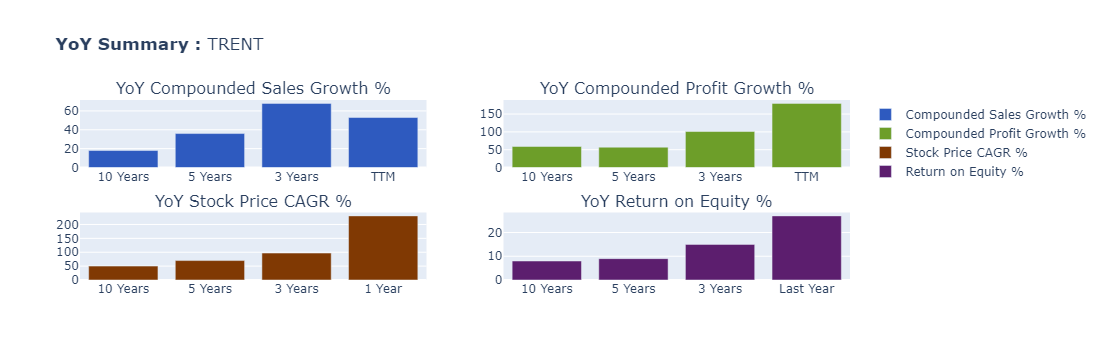

In [177]:

## Charting
fig6 = go.Figure()

x1 = df_compounded_sales_growth['Compounded Sales Growth']
y1 = df_compounded_sales_growth['Compounded Sales Growth.1'].str.rstrip('%').replace('','NaN').astype(float) # Column

x2 = df_compounded_profit_growth['Compounded Profit Growth']
y2 = df_compounded_profit_growth['Compounded Profit Growth.1'].str.rstrip('%').replace('','NaN').astype(float) # Column

x3 = df_stock_price_cagr['Stock Price CAGR']
y3 = df_stock_price_cagr['Stock Price CAGR.1'].str.rstrip('%').replace('','NaN').astype(float) # Column

x4 = df_return_on_equity['Return on Equity']
y4 = df_return_on_equity['Return on Equity.1'].str.rstrip('%').replace('','NaN').astype(float) # Column



fig6 = make_subplots(
        rows=2,
        cols=2,
        specs=[
            [{"type": "bar"}, {"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"}],
        ],
       subplot_titles=('YoY Compounded Sales Growth %', 'YoY Compounded Profit Growth %', 
                       'YoY Stock Price CAGR %', 'YoY Return on Equity %')
    )

fig6.add_trace(go.Bar( x=x1, y=y1, 
                      name='Compounded Sales Growth %', 
                      marker_color ="#2e5abf",  #6d9e29 1c9c7c
                     ),
               row=1, col=1
              )

fig6.add_trace(go.Bar( x=x2, y=y2, 
                      name='Compounded Profit Growth %', 
                      marker_color ="#6d9e29",  #6d9e29 1c9c7c
                     ),
               row=1, col=2
              )


fig6.add_trace(go.Bar( x=x3, y=y3, 
                      name='Stock Price CAGR %', 
                      marker_color ="#803903",  #6d9e29 1c9c7c
                     ),
               row=2, col=1
              )

fig6.add_trace(go.Bar( x=x4, y=y4, 
                      name='Return on Equity %', 
                      marker_color ="#5c1e6e",  #6d9e29 1c9c7c
                     ),
               row=2, col=2
              )

 
plot_title = '<b>YoY Summary : </b>' + stock_symbol

fig6.update_layout(
        title=plot_title)

# pyo.plot(fig, filename="temp-plot.html")
fig6.show()


## 4.2 Ratios Data - ROE or ROCE :  

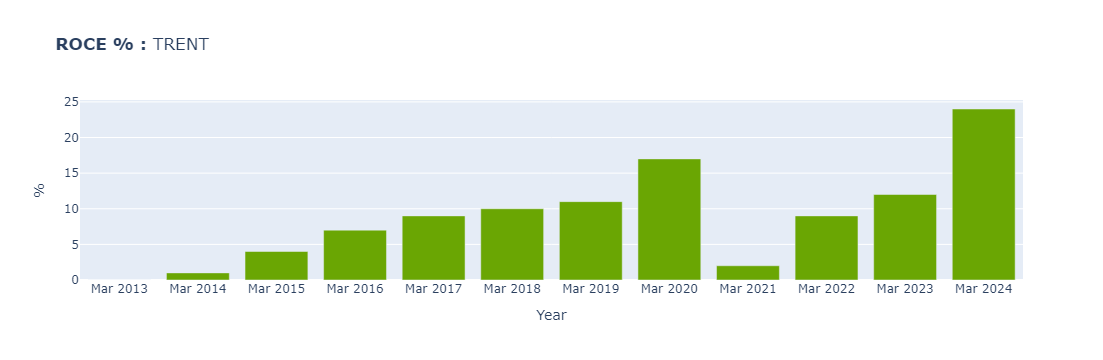

In [178]:
## Charting
fig7 = go.Figure()

plot_title = '<b>ROE % or ROCE : </b>' + stock_symbol

fig7.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title='%')


if 'ROE %' in df_ratios.columns:
    plot_title = '<b>ROE % : </b>' + stock_symbol
    x  = df_ratios.index
    y1 = df_ratios['ROE %'].str.rstrip('%').replace('','NaN').astype(float) # Column
    fig7.add_trace(go.Bar(x=x, y=y1, name='ROE %', marker_color ="#6aa603"))
    fig7.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title='%')

elif 'ROCE %' in df_ratios.columns:
    plot_title = '<b>ROCE % : </b>' + stock_symbol
    x  = df_ratios.index
    y1 = df_ratios['ROCE %'].str.rstrip('%').replace('','NaN').astype(float) # Column
    fig7.add_trace(go.Bar(x=x, y=y1, name='ROCE %', marker_color ="#6aa603"))
    fig7.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title='%')
    


    # pyo.plot(fig, filename="temp-plot.html")
fig7.show()

# 5. Part-5. Shareholding Pattern: 

## 5.1 Shareholders by Type: 

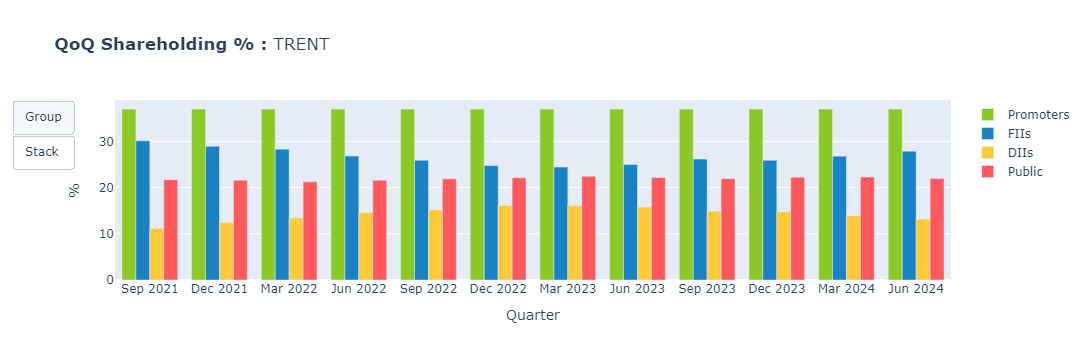

In [179]:
## Charting
fig8 = go.Figure()


shareholding_items = ['Promoters','FIIs','DIIs','Public','Government']

marker_colors = {
    'Promoters' : '#8ac926',
    'FIIs' : '#1982c4',
    'DIIs' : '#ffca3a',
    'Public' : '#ff595e',
    'Government' : '#7731b0'
}

for si in shareholding_items:
    if si in df_shareholding_pattern.columns:
        x = df_shareholding_pattern.index
        y = df_shareholding_pattern[si].str.rstrip('%').replace('','NaN').astype(float) # Column
        fig8.add_trace(go.Bar(x=x, y=y, name=si, marker_color=marker_colors.get(si))) 


plot_title = '<b>QoQ Shareholding % : </b>' + stock_symbol

fig8.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='%')



updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

fig8.update_layout(updatemenus=updatemenus)

 
fig8.show()

## 5.2 Number of Shareholders: 

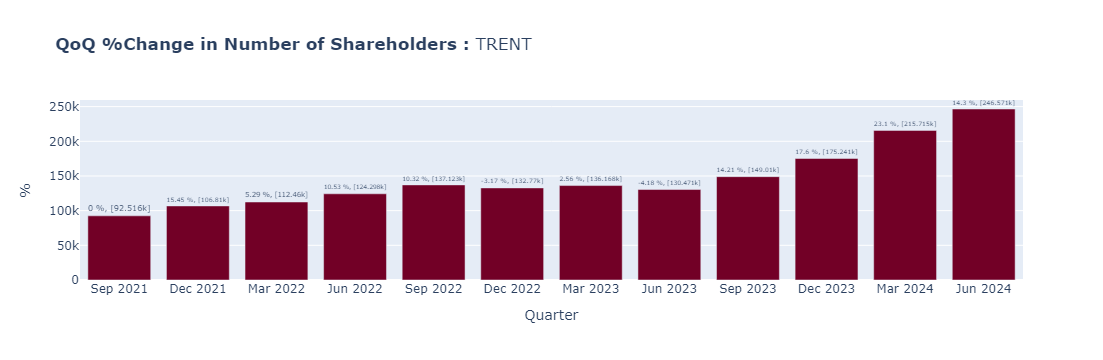

In [180]:
## Charting
fig9 = go.Figure()

x  = df_shareholding_pattern.index
y1 = df_shareholding_pattern['No. of Shareholders'].astype(int) # Column
y2 = df_shareholding_pattern['Shareholders Change %'].apply(lambda x: round(x, 2)) # Percent Change 

fig9.add_trace(go.Bar( x=x, y=y1, 
                      name='No. of Shareholders', 
                      marker_color ="#720026", 
                      text=y2,
                      textposition="outside",
                      texttemplate="%{text} %, [%{y}]"
                     )
              )

plot_title = '<b>QoQ %Change in Number of Shareholders : </b>' + stock_symbol

fig9.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title=' % ')

# pyo.plot(fig, filename="temp-plot.html")
fig9.show()

# 6. Part-6. Cash Flow: 

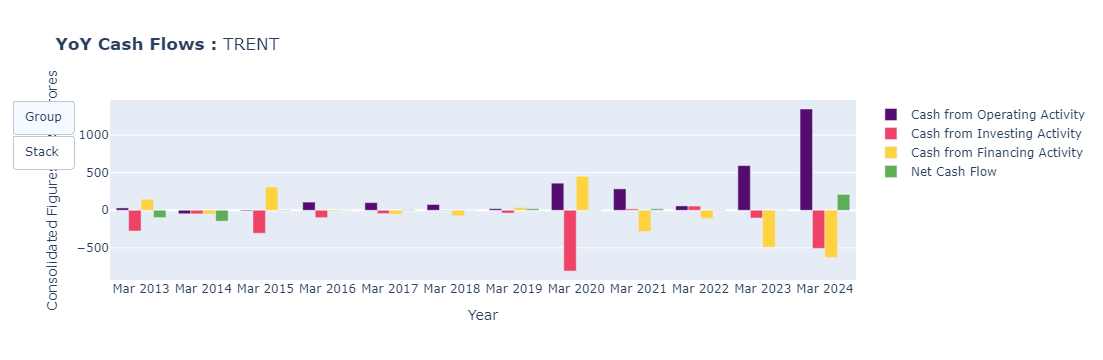

In [181]:
## Charting
fig10 = go.Figure()


cash_flow_items = ['Cash from Operating Activity','Cash from Investing Activity','Cash from Financing Activity','Net Cash Flow']

marker_colors = {
    'Cash from Operating Activity' : '#540d6e',
    'Cash from Investing Activity':'#ee4266',
    'Cash from Financing Activity':'#ffd23f',
    'Net Cash Flow':'#5fad56',
}


for ci in cash_flow_items:
    if ci in df_cash_flows.columns:
        x = df_cash_flows.index
        y = df_cash_flows[ci].astype(float)
        fig10.add_trace(go.Bar(x=x, y=y, name=ci, marker_color=marker_colors.get(ci))) 


plot_title = '<b>YoY Cash Flows : </b>' + stock_symbol

fig10.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title='Consolidated Figures in Rs. Crores')


updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

fig10.update_layout(updatemenus=updatemenus)

 
fig10.show()

# 7. Part-7. Profit and Loss: 

## 7.1 Profit and Loss - Sales, Expenses, Operating Profit, and Net Profit Trend:

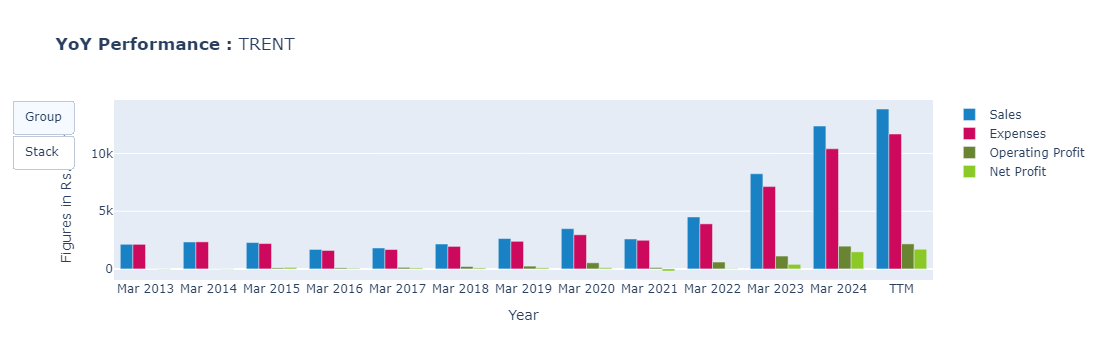

In [182]:
## Charting
fig11 = go.Figure()


profit_n_loss_items = ['Sales','Revenue', 'Expenses', 'Operating Profit', 'Financing Profit', 'Net Profit']

marker_colors = {
    'Sales' : '#1982c4',
    'Revenue':'#1982c4',
    'Expenses':'#cc095d',
    'Operating Profit':'#6a8532',
    'Financing Profit':'#6a8532',
    'Net Profit':'#8ac926',
}


for pli in profit_n_loss_items:
    if pli in df_profit_n_loss.columns:
        x = df_profit_n_loss.index
        y = df_profit_n_loss[pli].astype(float)
        fig11.add_trace(go.Bar(x=x, y=y, name=pli, marker_color=marker_colors.get(pli))) 


plot_title = '<b>YoY Performance : </b>' + stock_symbol

fig11.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title='Figures in Rs. Crores')

updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

fig11.update_layout(updatemenus=updatemenus)

 
fig11.show()

## 7.2 Profit and Loss - Profit Margin % and Net Profit Margin % Trend:

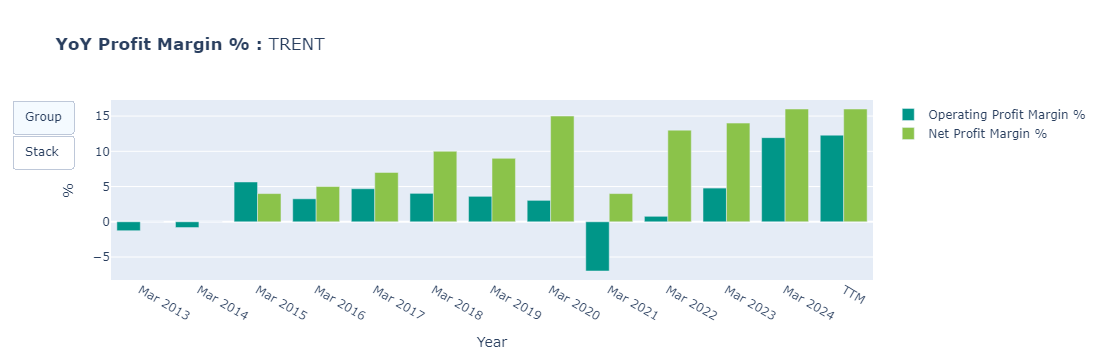

In [183]:
## Charting
fig12 = go.Figure()


x  = df_profit_n_loss.index
y1 = df_profit_n_loss['Sales'].astype(float) 
y2 = df_profit_n_loss['Net Profit'].astype(float)

y3 = y2 / y1 * 100

y4 = df_profit_n_loss['Profit Margin %'].str.rstrip('%').replace('','NaN').astype(float)

fig12.add_trace(go.Bar(x=x, y=y3, name='Operating Profit Margin %', marker_color ="#009688"))
fig12.add_trace(go.Bar(x=x, y=y4, name='Net Profit Margin %', marker_color ="#8bc34a"))

plot_title = '<b>YoY Profit Margin % : </b>' + stock_symbol

fig12.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title=' % ')

updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

fig12.update_layout(updatemenus=updatemenus)

fig12.show()




 

## 7.3 Profit and Loss - EPS Trend:

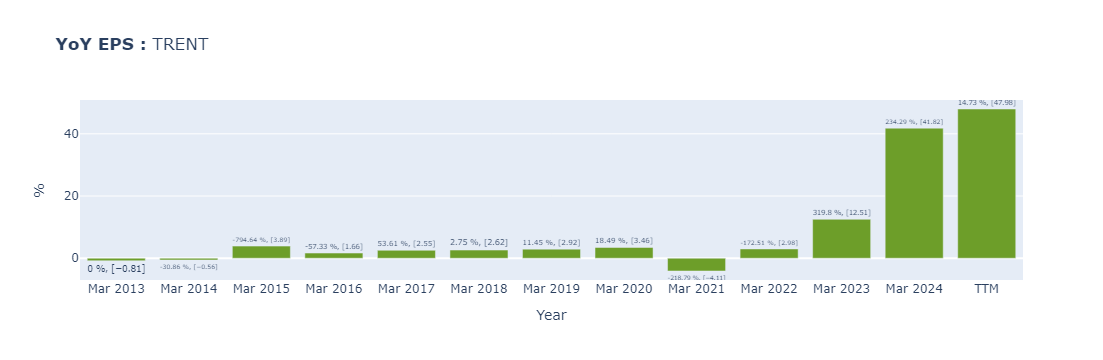

In [184]:
## Charting
fig13 = go.Figure()

x  = df_profit_n_loss.index
y1 = df_profit_n_loss['EPS in Rs'].astype(float) # EPS Column
y2 = df_profit_n_loss['EPS Change %'].apply(lambda x: round(x, 2)) # Percent Change 


# https://stackoverflow.com/a/70452260/1176573

fig13.add_trace(go.Bar( x=x, y=y1, 
                      name='EPS in Rs', 
                      marker_color ="#6d9e29",  #6d9e29 1c9c7c
                      text=y2,
                      textposition="outside",
                      texttemplate="%{text} %, [%{y}]"
                     )
              )

plot_title = '<b>YoY EPS : </b>' + stock_symbol

fig13.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title=' % ')

# pyo.plot(fig, filename="temp-plot.html")
fig13.show()

## 7.4 Profit and Loss - Dividend Payout % Trend:

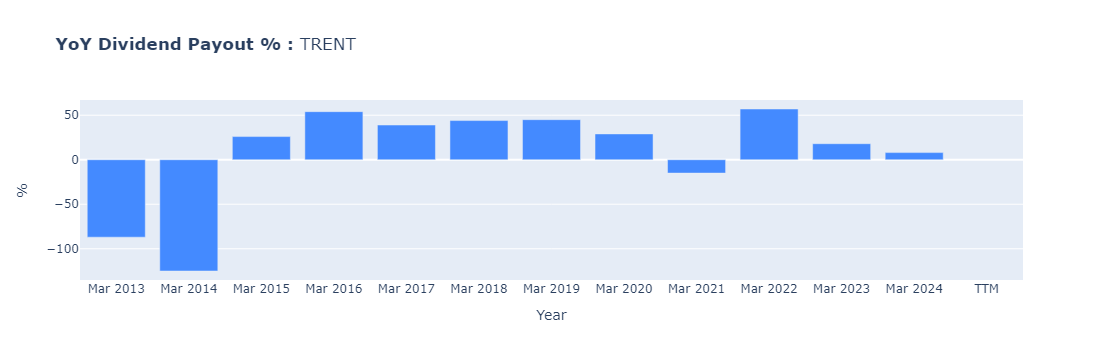

In [185]:
## Charting
fig14 = go.Figure()

x  = df_profit_n_loss.index
y1 = df_profit_n_loss['Dividend Payout %'].str.rstrip('%').replace('','NaN').astype(float)

fig14.add_trace(go.Bar( x=x, y=y1, 
                      name='Dividend Payout %', 
                      marker_color ="#448aff"
                     )
              )

plot_title = '<b>YoY Dividend Payout % : </b>' + stock_symbol

fig14.update_layout(
        title=plot_title,
        xaxis_title='Year',
        yaxis_title=' % ')

# pyo.plot(fig, filename="temp-plot.html")
fig14.show()

# 8. Part-8. Balance Sheet: 

In [186]:
df_balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Mar 2013 to Mar 2024
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Equity Capital     12 non-null     int64
 1   Reserves           12 non-null     int64
 2   Borrowings         12 non-null     int64
 3   Other Liabilities  12 non-null     int64
 4   Total Liabilities  12 non-null     int64
 5   Fixed Assets       12 non-null     int64
 6   CWIP               12 non-null     int64
 7   Investments        12 non-null     int64
 8   Other Assets       12 non-null     int64
 9   Total Assets       12 non-null     int64
dtypes: int64(10)
memory usage: 1.0+ KB


In [187]:
df_balance_sheet.iloc[:, :]

Year,Equity Capital,Reserves,Borrowings,Other Liabilities,Total Liabilities,Fixed Assets,CWIP,Investments,Other Assets,Total Assets
Mar 2013,33,1198,343,635,2209,843,106,317,943,2209
Mar 2014,33,958,332,614,1936,720,138,300,778,1936
Mar 2015,33,1389,267,518,2207,668,92,740,706,2207
Mar 2016,33,1431,400,292,2157,477,55,1067,558,2157
Mar 2017,33,1514,392,283,2222,549,5,1080,588,2222
Mar 2018,33,1562,391,349,2336,613,10,1023,691,2336
Mar 2019,33,1613,494,418,2559,662,87,883,927,2559
Mar 2020,36,2352,300,2819,5507,2738,23,1515,1230,5507
Mar 2021,36,2277,300,3111,5724,3054,108,1487,1075,5724
Mar 2022,36,2328,4725,637,7726,4687,105,1284,1651,7726


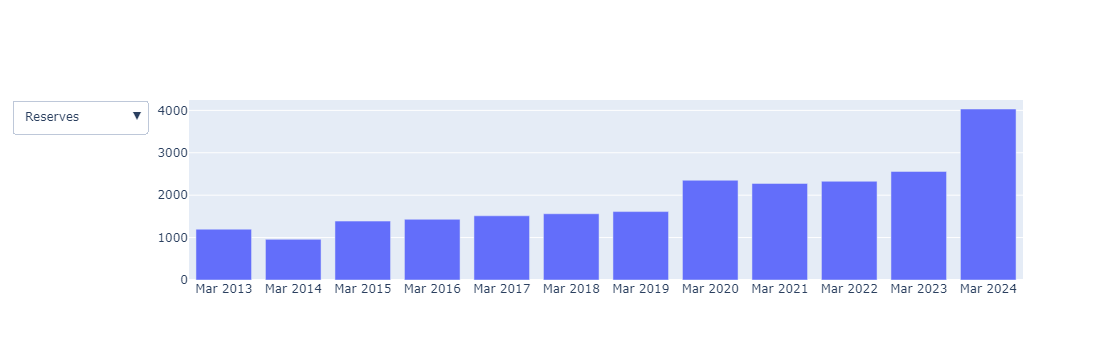

In [188]:
fig15 = go.Figure()

balance_sheet_items = ['Equity Capital', 'Reserves', 'Borrowings', 'Other Liabilities',
       'Total Liabilities', 'Fixed Assets', 'CWIP', 'Investments',
       'Other Assets', 'Total Assets']

marker_colors = {
   'Equity Capital':'#66418a', 
   'Reserves':'#21b534', 
    'Borrowings':'#e03524', 
    'Other Liabilities':'#f07c12',
    'Total Liabilities':'#9d0208', 
    'Fixed Assets':'#696968', 
    'CWIP':'#bd9a7a', 
    'Investments':'#017365',
    'Other Assets':'#763fa3', 
    'Total Assets':'#43aa8b',
}

#x = df_balance_sheet.index

# for item in df_balance_sheet:
#     if item in df_balance_sheet.columns:
#         x = df_balance_sheet.index
#         y = df_balance_sheet[item].astype(float)
#         fig15.add_trace(go.Bar(x=x, y=y, name=item, marker_color=marker_colors.get(item))) 


plot_title = '<b>Balance Sheet : </b>' + stock_symbol



x = df_balance_sheet.index
y = df_balance_sheet[df_balance_sheet.columns[1]]  # fisrt stock

fig15.add_traces(go.Bar(x=x, y=y))

# create `list` with a `dict` for each column
buttons = [
            {
             'method': 'update', 
             'label': col, 
             'args': [ {'y': [ df_balance_sheet[col] ], 'marker.color': [marker_colors.get(col)]} ]
            } 
            for col in df_balance_sheet.iloc[:, 1:]
          ]

# add menus
updatemenus = [{'buttons': buttons,
                'direction': 'down',
                'showactive': True,}]

# update layout with buttons, and show the figure
fig15.update_layout(updatemenus=updatemenus)

fig15.show()

# 9. Part-9 Finally, create HTML Report: 

In [189]:
html_report_path = "../Output/VisualReports/"+stock_symbol+"-"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+".html"

all_figures = [
    fig1,
    fig2,
    fig3,
    fig4,
    fig5,
    fig6,
    fig7,
    fig8,
    fig9,
    fig10,
    fig11,
    fig12,
    fig13,
    fig14,
    fig15
]


with open(html_report_path, 'a') as f:
    for fig in all_figures:
        f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))
   



# with open(html_report_path, 'a') as f:
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))

